In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag
from collections import Counter
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn


import warnings
warnings.filterwarnings("ignore")

#### 참고

In [61]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

nltk.download("punkt")
nltk.download('wordnet')

def penn_to_wn(tag):
    if tag.startswith("J"):
        return wn.ADJ
    elif tag.startswith("N"):
        return wn.NOUN
    elif tag.startswith("R"):
        return wn.ADV
    elif tag.startswith("V"):
        return wn.VERB

def words_lemmatizer(pos_tagged_words):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word, tag in pos_tagged_words:
        wn_tag = penn_to_wn(tag)
        if wn_tag in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
            stem = lemmatizer.lemmatize(word, wn_tag)
            lemmatized_words.append(stem)
        else:
            lemmatized_words.append(word)
    return lemmatized_words

def clean_by_freq(tokenized_words, cut_off_count):
    vocab = Counter(tokenized_words)

    # 빈도수가 cut_off_count 이하인 단어를 제거하는 코드를 작성해 주세요
    uncommon_words = {key for key, value in vocab.items() if value <= cut_off_count}
    cleaned_words = [word for word in tokenized_words if word not in uncommon_words]

    return cleaned_words


def clean_by_len(tokenized_words, cut_off_length):
    cleaned_words = []

    for word in tokenized_words:
        # 길이가 cut_off_length 이하인 단어 제거하는 코드를 작성해 주세요
        if len(word) > cut_off_length:
            cleaned_words.append(word)

    return cleaned_words

def clean_by_freq(tokenized_words, cut_off_count):
    vocab = Counter(tokenized_words)

    # 빈도수가 cut_off_count 이하인 단어를 제거하는 코드를 작성해 주세요
    uncommon_words = {key for key, value in vocab.items() if value <= cut_off_count}
    cleaned_words = [word for word in tokenized_words if word not in uncommon_words]

    return cleaned_words


def clean_by_len(tokenized_words, cut_off_length):
    cleaned_words = []

    for word in tokenized_words:
        # 길이가 cut_off_length 이하인 단어 제거하는 코드를 작성해 주세요
        if len(word) > cut_off_length:
            cleaned_words.append(word)

    return cleaned_words

def pos_tagger(tokenized_sents):
    pos_tagged_words = []

    for sentence in tokenized_sents:
        # 단어 토큰화
        tokenized_words = word_tokenize(sentence)
    
        # 품사 태깅
        pos_tagged = pos_tag(tokenized_words)
        pos_tagged_words.extend(pos_tagged)
    
    return pos_tagged_words

# 불용어 제거 함수
def clean_by_stopwords(tokenized_words, stop_words_set):
    cleaned_words = []
    
    for word in tokenized_words:
        if word not in stop_words_set:
            cleaned_words.append(word)
            
    return cleaned_words

stopwords_set = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DIA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 데이터 준비

In [66]:
df = pd.read_excel("full.xlsx")
df

,Unnamed: 0,review,star
0,0,I use it and it shows your skin glow but your ...,1
1,1,If you are someone who regularly purges when t...,1
2,2,I tried so hard to like thus spray but unfortu...,1
3,3,This serum has artificial fragrance and theref...,1
4,4,First off I want to say I don’t have sensitive...,1
...,...,...,...
495,495,This was recommended by “ PAINTED BY SPENCER” ...,5
496,496,Deja un rico aroma y hidrata,5
497,497,It’s work very well I recommend it 🥰🥰🥰🥰 great ...,5
498,498,This really melts your makeup together as sett...,5


## 감성 분석

In [68]:
del df['Unnamed: 0']
df['review'].str.lower() 
df["sent_tokens"] = df['review'].apply(sent_tokenize)
df["pos_tagged_tokens"] = df["sent_tokens"].apply(pos_tagger)
df["lemmatized_tokens"] = df["pos_tagged_tokens"].apply(words_lemmatizer)

df["cleaned_tokens"] = df['lemmatized_tokens'].apply(lambda x : clean_by_len(x,2))

df['cleaned_tokens'].apply(lambda x : clean_by_stopwords(x, stopwords_set))
df

,review,star,sent_tokens,pos_tagged_tokens,lemmatized_tokens,cleaned_tokens
0,I use it and it shows your skin glow but your ...,1,[I use it and it shows your skin glow but your...,"[(I, PRP), (use, VBP), (it, PRP), (and, CC), (...","[I, use, it, and, it, show, your, skin, glow, ...","[use, and, show, your, skin, glow, but, your, ..."
1,If you are someone who regularly purges when t...,1,[If you are someone who regularly purges when ...,"[(If, IN), (you, PRP), (are, VBP), (someone, N...","[If, you, be, someone, who, regularly, purge, ...","[you, someone, who, regularly, purge, when, tr..."
2,I tried so hard to like thus spray but unfortu...,1,[I tried so hard to like thus spray but unfort...,"[(I, PRP), (tried, VBD), (so, RB), (hard, JJ),...","[I, try, so, hard, to, like, thus, spray, but,...","[try, hard, like, thus, spray, but, unfortunat..."
3,This serum has artificial fragrance and theref...,1,[This serum has artificial fragrance and there...,"[(This, DT), (serum, NN), (has, VBZ), (artific...","[This, serum, have, artificial, fragrance, and...","[This, serum, have, artificial, fragrance, and..."
4,First off I want to say I don’t have sensitive...,1,[First off I want to say I don’t have sensitiv...,"[(First, NNP), (off, RP), (I, PRP), (want, VBP...","[First, off, I, want, to, say, I, don, ’, t, h...","[First, off, want, say, don, have, sensitive, ..."
...,...,...,...,...,...,...
495,This was recommended by “ PAINTED BY SPENCER” ...,5,[This was recommended by “ PAINTED BY SPENCER”...,"[(This, DT), (was, VBD), (recommended, VBN), (...","[This, be, recommend, by, “, PAINTED, BY, SPEN...","[This, recommend, PAINTED, SPENCER, YOU, TUBE,..."
496,Deja un rico aroma y hidrata,5,[Deja un rico aroma y hidrata],"[(Deja, NNP), (un, JJ), (rico, NN), (aroma, NN...","[Deja, un, rico, aroma, y, hidrata]","[Deja, rico, aroma, hidrata]"
497,It’s work very well I recommend it 🥰🥰🥰🥰 great ...,5,[It’s work very well I recommend it 🥰🥰🥰🥰 great...,"[(It, PRP), (’, VBZ), (s, JJ), (work, NN), (ve...","[It, ’, s, work, very, well, I, recommend, it,...","[work, very, well, recommend, 🥰🥰🥰🥰, great, pro..."
498,This really melts your makeup together as sett...,5,[This really melts your makeup together as set...,"[(This, DT), (really, RB), (melts, VB), (your,...","[This, really, melt, your, makeup, together, a...","[This, really, melt, your, makeup, together, s..."


In [74]:
words = []

for i in df["cleaned_tokens"]:
    words += i
    
vocab = Counter(words)
vocab = vocab.most_common()

word_to_idx = {}
for word, freq in vocab:
    word_to_idx[word] = len(word_to_idx) + 1 

word_to_idx

{'and': 1,
 'the': 2,
 'this': 3,
 'skin': 4,
 'have': 5,
 'product': 6,
 'use': 7,
 'not': 8,
 'for': 9,
 'but': 10,
 'spray': 11,
 'that': 12,
 'like': 13,
 'face': 14,
 'smell': 15,
 'you': 16,
 'look': 17,
 'The': 18,
 'with': 19,
 'feel': 20,
 'glow': 21,
 'make': 22,
 'after': 23,
 'This': 24,
 'give': 25,
 'your': 26,
 'just': 27,
 'dry': 28,
 'good': 29,
 "n't": 30,
 'get': 31,
 'love': 32,
 'all': 33,
 'out': 34,
 'day': 35,
 'more': 36,
 'really': 37,
 'very': 38,
 'buy': 39,
 'will': 40,
 'nice': 41,
 'when': 42,
 'try': 43,
 'because': 44,
 'can': 45,
 'makeup': 46,
 'one': 47,
 'scent': 48,
 'about': 49,
 'fragrance': 50,
 'work': 51,
 'don': 52,
 'serum': 53,
 'bottle': 54,
 'mist': 55,
 'much': 56,
 'think': 57,
 'see': 58,
 'time': 59,
 'great': 60,
 'what': 61,
 'say': 62,
 'strong': 63,
 'want': 64,
 'would': 65,
 'well': 66,
 'from': 67,
 'again': 68,
 'recommend': 69,
 'first': 70,
 'oil': 71,
 'skincare': 72,
 'too': 73,
 'even': 74,
 'sensitive': 75,
 'hydrate': 7

In [76]:
def idx_encoder(tokens, word_to_idx):
    idx_box = []
    for i in tokens:
        idx_box.append(word_to_idx[i])
    return idx_box

In [78]:
df['interger_encoded'] = df['cleaned_tokens'].apply(lambda x : idx_encoder(x, word_to_idx))
df

,review,star,sent_tokens,pos_tagged_tokens,lemmatized_tokens,cleaned_tokens,interger_encoded
0,I use it and it shows your skin glow but your ...,1,[I use it and it shows your skin glow but your...,"[(I, PRP), (use, VBP), (it, PRP), (and, CC), (...","[I, use, it, and, it, show, your, skin, glow, ...","[use, and, show, your, skin, glow, but, your, ...","[7, 1, 390, 26, 4, 21, 10, 26, 4, 144, 28, 16,..."
1,If you are someone who regularly purges when t...,1,[If you are someone who regularly purges when ...,"[(If, IN), (you, PRP), (are, VBP), (someone, N...","[If, you, be, someone, who, regularly, purge, ...","[you, someone, who, regularly, purge, when, tr...","[16, 294, 198, 566, 731, 42, 43, 190, 6, 92, 1..."
2,I tried so hard to like thus spray but unfortu...,1,[I tried so hard to like thus spray but unfort...,"[(I, PRP), (tried, VBD), (so, RB), (hard, JJ),...","[I, try, so, hard, to, like, thus, spray, but,...","[try, hard, like, thus, spray, but, unfortunat...","[43, 471, 13, 734, 11, 10, 233, 161, 472, 2, 4..."
3,This serum has artificial fragrance and theref...,1,[This serum has artificial fragrance and there...,"[(This, DT), (serum, NN), (has, VBZ), (artific...","[This, serum, have, artificial, fragrance, and...","[This, serum, have, artificial, fragrance, and...","[24, 53, 5, 736, 50, 1, 1125, 8, 474, 9, 75, 1..."
4,First off I want to say I don’t have sensitive...,1,[First off I want to say I don’t have sensitiv...,"[(First, NNP), (off, RP), (I, PRP), (want, VBP...","[First, off, I, want, to, say, I, don, ’, t, h...","[First, off, want, say, don, have, sensitive, ...","[235, 199, 64, 62, 52, 5, 75, 4, 24, 174, 1129..."
...,...,...,...,...,...,...,...
495,This was recommended by “ PAINTED BY SPENCER” ...,5,[This was recommended by “ PAINTED BY SPENCER”...,"[(This, DT), (was, VBD), (recommended, VBN), (...","[This, be, recommend, by, “, PAINTED, BY, SPEN...","[This, recommend, PAINTED, SPENCER, YOU, TUBE,...","[24, 69, 2496, 2497, 2498, 2499, 32, 575, 686,..."
496,Deja un rico aroma y hidrata,5,[Deja un rico aroma y hidrata],"[(Deja, NNP), (un, JJ), (rico, NN), (aroma, NN...","[Deja, un, rico, aroma, y, hidrata]","[Deja, rico, aroma, hidrata]","[1099, 1097, 385, 1008]"
497,It’s work very well I recommend it 🥰🥰🥰🥰 great ...,5,[It’s work very well I recommend it 🥰🥰🥰🥰 great...,"[(It, PRP), (’, VBZ), (s, JJ), (work, NN), (ve...","[It, ’, s, work, very, well, I, recommend, it,...","[work, very, well, recommend, 🥰🥰🥰🥰, great, pro...","[51, 38, 66, 69, 2501, 60, 6]"
498,This really melts your makeup together as sett...,5,[This really melts your makeup together as set...,"[(This, DT), (really, RB), (melts, VB), (your,...","[This, really, melt, your, makeup, together, a...","[This, really, melt, your, makeup, together, s...","[24, 37, 709, 26, 46, 700, 206, 11, 10, 81, 16..."


In [80]:
max_len = 0
for i in df['interger_encoded']:
    if len(i) >= max_len:
        max_len = len(i)

for tokens in df['interger_encoded']:
    while len(tokens) < max_len:
        tokens.append(0)

In [85]:
word = wn.synsets("lead")

In [89]:
def senti_score_cal(tokens):
    pos_tagged_words = tokens
    score = 0
    for word, tag in pos_tagged_words:
        tag = penn_to_wn(tag)
        if tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
            continue
        if not wn.synsets(word, tag):
            continue
        else:
            synsets = wn.synsets(word, tag)
    
        synset = synsets[0]
        senti = swn.senti_synset(synset.name())
        senti2 = senti.pos_score() - senti.neg_score()
        
        score += senti2
    
    return score

In [91]:
df['senti_score'] = df['pos_tagged_tokens'].apply(senti_score_cal)
df

,review,star,sent_tokens,pos_tagged_tokens,lemmatized_tokens,cleaned_tokens,interger_encoded,senti_score
0,I use it and it shows your skin glow but your ...,1,[I use it and it shows your skin glow but your...,"[(I, PRP), (use, VBP), (it, PRP), (and, CC), (...","[I, use, it, and, it, show, your, skin, glow, ...","[use, and, show, your, skin, glow, but, your, ...","[7, 1, 390, 26, 4, 21, 10, 26, 4, 144, 28, 16,...",1.250
1,If you are someone who regularly purges when t...,1,[If you are someone who regularly purges when ...,"[(If, IN), (you, PRP), (are, VBP), (someone, N...","[If, you, be, someone, who, regularly, purge, ...","[you, someone, who, regularly, purge, when, tr...","[16, 294, 198, 566, 731, 42, 43, 190, 6, 92, 1...",0.500
2,I tried so hard to like thus spray but unfortu...,1,[I tried so hard to like thus spray but unfort...,"[(I, PRP), (tried, VBD), (so, RB), (hard, JJ),...","[I, try, so, hard, to, like, thus, spray, but,...","[try, hard, like, thus, spray, but, unfortunat...","[43, 471, 13, 734, 11, 10, 233, 161, 472, 2, 4...",-1.375
3,This serum has artificial fragrance and theref...,1,[This serum has artificial fragrance and there...,"[(This, DT), (serum, NN), (has, VBZ), (artific...","[This, serum, have, artificial, fragrance, and...","[This, serum, have, artificial, fragrance, and...","[24, 53, 5, 736, 50, 1, 1125, 8, 474, 9, 75, 1...",1.625
4,First off I want to say I don’t have sensitive...,1,[First off I want to say I don’t have sensitiv...,"[(First, NNP), (off, RP), (I, PRP), (want, VBP...","[First, off, I, want, to, say, I, don, ’, t, h...","[First, off, want, say, don, have, sensitive, ...","[235, 199, 64, 62, 52, 5, 75, 4, 24, 174, 1129...",1.375
...,...,...,...,...,...,...,...,...
495,This was recommended by “ PAINTED BY SPENCER” ...,5,[This was recommended by “ PAINTED BY SPENCER”...,"[(This, DT), (was, VBD), (recommended, VBN), (...","[This, be, recommend, by, “, PAINTED, BY, SPEN...","[This, recommend, PAINTED, SPENCER, YOU, TUBE,...","[24, 69, 2496, 2497, 2498, 2499, 32, 575, 686,...",1.125
496,Deja un rico aroma y hidrata,5,[Deja un rico aroma y hidrata],"[(Deja, NNP), (un, JJ), (rico, NN), (aroma, NN...","[Deja, un, rico, aroma, y, hidrata]","[Deja, rico, aroma, hidrata]","[1099, 1097, 385, 1008, 0, 0, 0, 0, 0, 0, 0, 0...",0.000
497,It’s work very well I recommend it 🥰🥰🥰🥰 great ...,5,[It’s work very well I recommend it 🥰🥰🥰🥰 great...,"[(It, PRP), (’, VBZ), (s, JJ), (work, NN), (ve...","[It, ’, s, work, very, well, I, recommend, it,...","[work, very, well, recommend, 🥰🥰🥰🥰, great, pro...","[51, 38, 66, 69, 2501, 60, 6, 0, 0, 0, 0, 0, 0...",0.250
498,This really melts your makeup together as sett...,5,[This really melts your makeup together as set...,"[(This, DT), (really, RB), (melts, VB), (your,...","[This, really, melt, your, makeup, together, a...","[This, really, melt, your, makeup, together, s...","[24, 37, 709, 26, 46, 700, 206, 11, 10, 81, 16...",-1.000


## 별점별 감성 분석 시각화

In [93]:
df['kind of review'] = df['senti_score'].apply(lambda x: 'pos' if x > 0 else 'neg' if x < 0 else 'mid')

review_counts = df.groupby(['star', 'kind of review']).size().unstack(fill_value=0)
review_counts

kind of review,mid,neg,pos
star,,,
1,17,43,40
2,21,29,50
3,14,34,52
4,17,21,62
5,25,8,67


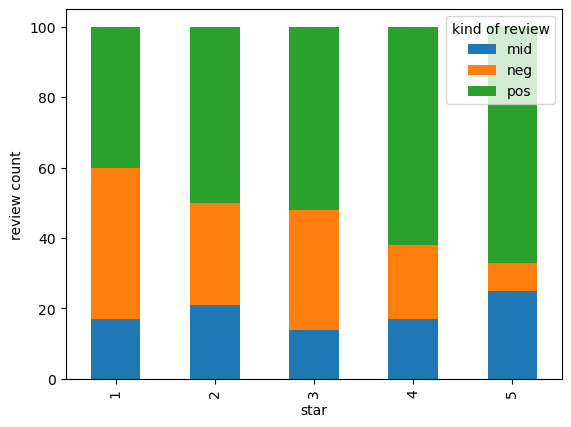

In [95]:
review_counts.plot(kind='bar', stacked=True)
plt.xlabel('star')
plt.ylabel('review count')
plt.show()